# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
SEED = 123456
import os
import random as rn
import numpy as np

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = rn.gauss(450., 25.)
        return [new_thrust + rn.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

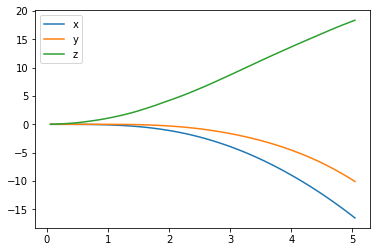

In [3]:
# FOR XSERVER RENDERING
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

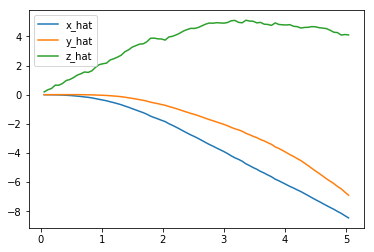

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

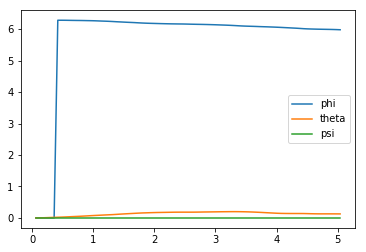

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

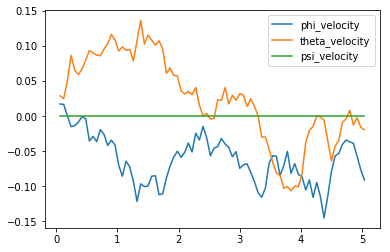

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

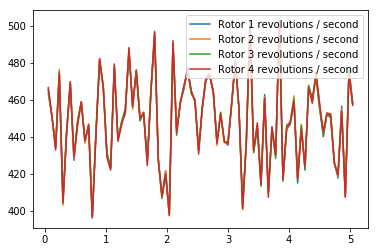

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-16.5066108  -10.07832751  18.35308862   5.98084762   0.12725616
   0.        ]
[-8.45968415 -6.90057982  4.10503812]
[-0.0909839 -0.0194037  0.       ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
# Visual Memory Storage for storing individual positions for later playback
from collections import namedtuple

class VisMem:
    def __init__(self):
        self.memory = []
        self.snapshots = namedtuple("Experience", field_names=["x", "y", "z", "phi", "theta", "psi"])

    def add(self,p):
        """Add a new experience to memory."""
        e = self.snapshots(p[0], p[1], p[2], p[3], p[4], p[5])
        self.memory.append(e)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [45]:
# SIMULATION THANKS TO https://github.com/AtsushiSakai/PythonRobotics
import sys
from Quadrotor import Quadrotor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import display, clear_output
from PIL import Image
import io

# X PHI = YAW
# Y THETA = ROLL
# Z PSI = PITCH

# Animation function for FuncAnimation
def animate(i, vs):
    res = vs.vmem.memory
    q = vs.qd
    ani = q.update_pose(x=res[i][0], 
    y=res[i][1], 
    z=res[i][2], 
    roll=res[i][4],
    pitch=res[i][5], 
    yaw=res[i][3])
    return ani
    
# Store x, y, theta, phi, psi
class Visual:
    def __init__(self, pos):
        self.vmem = VisMem()
         # Initialize starting location
        self.qd = Quadrotor(x=pos[0], y=pos[1], z=pos[2], roll=pos[3], pitch=pos[4], yaw=pos[5], size=1, show_animation=True)
        
    def add(self, p):
        self.vmem.add(p)
        
    def save_gif(self, title):
        self.qd.clear_data()
        ani = animation.FuncAnimation(self.qd.fg, animate, frames=len(self.vmem), fargs=(self,),
        interval=100, blit=False, repeat=False)
        ani.save(str(title) + '.gif',writer='imagemagick', fps=30)
        plt.close()
        
    # Slow, but compatible
    def real_time(self, res):
        q = self.qd
        img_arr = q.update_pose(x=res[0], 
        y=res[1], 
        z=res[2], 
        roll=res[4],
        pitch=res[5],
        yaw=res[3])
        
        img = Image.fromarray(img_arr,mode='RGB')
        return img

    # Show entire episode
    def show_episode(self, widget):
        self.qd.clear_data()
        for res in self.vmem.memory:
            q = self.qd
            img_arr = q.update_pose(x=res[0], 
            y=res[1], 
            z=res[2], 
            roll=res[4],
            pitch=res[5], 
            yaw=res[3])
            
            img = Image.fromarray(img_arr,mode='RGB')
            f = io.BytesIO()
            img.save(f,'png') 
            
            widget.value = f.getvalue()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
import ipywidgets

widget_test = ipywidgets.Image(format='jpeg', width=244, height=244)
display(widget_test)

task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False

vs = Visual(init_pose)
plt.close()

while True:
    rotor_speeds = agent.act()
    _, _, done = task.step(rotor_speeds)
    img = vs.real_time(task.sim.pose)
    
    f = io.BytesIO()
    img.save(f,'png')  
    widget_test.value = f.getvalue()
    
    if done:
        break

Image(value=b'', format='jpeg', height='244', width='244')

In [12]:
import matplotlib.pyplot as plt

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

def plotter(x_vec,y_data,lines=[[],[],[]],identifier=''):
    # this is the call to matplotlib that allows dynamic plotting
    plt.ion()
    fig = plt.figure(figsize=(13,6))
    ax = fig.add_subplot(111)
    ax.set_autoscaley_on(True)
    # create a variable for the line so we can later update it
    labels = ['E1','E2', 'E3']
    #plt.bar(x_vec, y_data)
    
    lines[0], = ax.plot(x_vec,y_data[0],alpha=0.8, label=labels[0])        
    lines[1], = ax.plot(x_vec,y_data[1],alpha=0.8, label=labels[1]) 
    lines[2], = ax.plot(x_vec,y_data[2],alpha=0.8, label=labels[2]) 
    plt.legend(loc='upper right')

    #update plot label/title
    plt.ylabel('Reward')
    plt.title('{}'.format(identifier))
    #plt.show()

In [13]:
# Save session visuals and stats for analysis
class Stat:
    def __init__(self):
        # Statistics for single training session
        self.best_episode = Visual([0,0,0,0,0,0])
        self.best_reward_matrix = [[],[],[]]
        self.best_episode_num = 0
        self.best_score = -sys.maxsize-1
        
        self.reward_matrices = [] 
        self.all_rewards = [] 
        
        # All session best
        self.session_best = []
        self.count = 0

In [61]:
## plot rewards over all episodes
import pandas as pd

 # For plotting while training
def episodic_plot(data, title="Error Single Episode"):    
    fig2 = plt.figure()
    ax1 = plt.axes()
    fig2.set_size_inches(15,5)
    
    ax1.set_title(title)
    matrix = np.asmatrix(np.array(data))
    
    for i in range(matrix.shape[1]):
        ax1.plot(matrix[:,i], label=i)
        
    ax1.legend()
    

# Plot overall stats of session
def plot_stat(m):
    
    #Rewards over steps
    plt.plot(m.all_rewards, label='reward')
    plt.title("Mean Rewards All Episodes")
    plt.legend()
    _ = plt.ylim()
    
    reward_matrix = m.best_reward_matrix

    fig2 = plt.figure()
    ax1 = plt.axes()
    fig2.set_size_inches(10,10)

    # Mean Rewards
    df1 = pd.DataFrame(reward_matrix)
    p1 = df1.rolling(1).mean()
    
    p1 = reward_matrix
    
    title_str = "Episode # {}".format(m.best_episode_num)
    ax1.plot(p1, label='Single Episode')
    ax1.set_title(title_str)
    ax1.legend()

    # Mean Rewards
    df = pd.DataFrame(m.all_rewards)
    p4 = df.rolling(window=5).mean().plot()

In [15]:
import sys
import math
import cv2

# Teaching to hover
runtime = 2.                                     # time limit of the episode

init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 1.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 5.]) # Hover Position

# For multiple sessions
best_episodes = []
DEBUG = 0
EPISODE_PLOT = 0
REALTIME = 0

In [28]:
import time
from agents.agent import DDPG
from agents.agent import tfSummary
from Main_Task import M_Task
import random as rn
import IPython

# Useful periodic beeps for alerts
sound_file = 'beep.wav'
beep = IPython.display.Audio(sound_file, autoplay=True)

def train(task, agent, num_episodes):
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode()
        vs = Visual(task.sim.pose)
        plt.close()
        
        training_session.count += 1
        episode_rewards = 0
        steps = 0
        
        pid_action = 0
        chance = rn.randint(0, 1)
        if(chance):
            pid_action = 1
        
        while True:
            action, noise = agent.act(state) # agent action
            if(pid_action):
                action = task.ctr.update() # pid action
            next_state, reward, done = task.step(action, noise)
            episode_rewards += reward
            vs.add(task.sim.pose)                                      # Store episode visual
            agent.step(action, reward, next_state, done)
            
            state = next_state
            steps += 1
            
            if(REALTIME):
                image = np.float32(vs.real_time(task.sim.pose))
                info_str = "DIST {:1.3f} ID {:1d} REWARD {:1.3f} A {:1d}".format(task.dist, int(agent.batch_id), sum(task.get_reward()), pid_action)
                rotor_speeds = (task.pid_rotor_speeds).astype('int')
                line2 = "R1 {:1d} R2 {:1d} R3 {:1d} R4 {:1d}".format(rotor_speeds[0], rotor_speeds[1], rotor_speeds[2], rotor_speeds[3])

                cv2.putText(image, info_str, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0))
                cv2.putText(image, line2, (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image_widget.value = bytes(cv2.imencode('.jpg', image)[1])
            
            # For debugging
            if(DEBUG):
                image = vs.real_time(task.sim.pose)
                task.pretty(task.get_state())                           # STATE SPACE
                print("Noise", agent.noise.sample())                   # NOISE
                task.pretty(action)                                     # ACTION 
                pos = [("R"+str(i)) for i in range(len(task.get_reward())) ]
                task.pretty(task.get_reward(), pos)                      # REWARDS
                plt.imshow(image)         
                pausecmd = input("press enter to continue: ")
       
            if done:
                score = episode_rewards/steps
                total = episode_rewards
                training_session.all_rewards.append(score)
                
                tfscore = tfSummary('total_reward', total)
                agent.summary_writer.add_summary(tfscore, global_step=training_session.count)
                agent.summary_writer.flush()
                
                # Show final state
                image = np.float32(vs.real_time(task.sim.pose))
                info_str = "DIST {:1.3f} ID {:1d} REWARD {:1.3f} A {:1d}".format(task.dist, int(agent.batch_id), total, pid_action)
                cv2.putText(image, info_str, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image_widget.value = bytes(cv2.imencode('.jpg', image)[1])
                
                if(task.reached and False):
                    vs.show_episode(image_widget)
                    print("Steps: ", steps)
                    agent.save_model()

                if(score > training_session.best_score and pid_action == 0): 
                    #IPython.display.display(beep)
                    training_session.best_episode = vs
                    training_session.best_episode_num = training_session.count
                    training_session.best_reward_matrix = task.reward_arr
                    training_session.best_score = score
                        
                    vs.save_gif(training_session.count)
                    print("Saved Gif", training_session.count)

                    if(EPISODE_PLOT):
                        episodic_plot(task.reward_arr, "Episode Rewards breakdown")
                        episodic_plot(task.rotor_arr, "Rotor Speeds")
                        episodic_plot(task.noise_arr, "Noise")
                        plt.show()
                        plt.show()
                        plt.show()
                        
                        agent.save_model()
                        
                    best_episodes.append([vs,training_session.count])
                        
                # Episode Stats string
                epi_str = "Episode = {:4d}, avg_score = {:7.3f} runtime = {:7.3f} Noise = {:7.3f}, (best = {:7.3f})".format(
                        training_session.count, score, task.sim.time, agent.noise.sigma, training_session.best_score)
                
                # Sum of individual episode reward components
                matrix = np.asmatrix(task.reward_arr)
                m_arr = []
                for i in range(matrix.shape[1]):
                        m_arr = np.append(m_arr, matrix[:,i].sum())
                
                # Show episode rewards sum every single episode
                print(epi_str)
                pos = [("R"+str(i)) for i in range(m_arr.shape[0])]
                task.pretty(m_arr, pos)
                    
                break
            
        sys.stdout.flush()

In [17]:
from agents.agent import DDPG
from Main_Task import M_Task
# Initalize session stats
training_session = Stat()  
plt.close()

# Distance, Orientation, Angular, Linear
factor = [1,1,1,1]

# Refresh and run Tensorboard
f= open("cmdfile","w+")
f.write("1")
f.close()   

hover_task = M_Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos, factor)
ddpg_agent = DDPG(hover_task)

DDPG init Actor:  1e-05 Critic:  0.0001
Tau:  0.01 Sigma:  0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 12)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dens

In [36]:
import itertools ### Binary counter
import datetime
import csv

image_widget = ipywidgets.Image(format='jpeg', width=244, height=244)
display(image_widget)


# Filling buffer with nice samples
ddpg_agent.task.randomize = True
ddpg_agent.noise.sigma = 0.002
ddpg_agent.tau = 0.002

# Options
REALTIME = 0
SHOW_EPISODE = 0
EPISODE_PLOT = 1
DEBUG = 0
EPISODES = 50

# Train agent
tm = time.process_time()
train(ddpg_agent.task, ddpg_agent, EPISODES)
elapsed_time = time.process_time() - tm

if(DEBUG == 0):
    # Score, CriticLR, ActorLR, Tau, Sigma, Network, (Count)
    with open("trials.csv","a") as csvFile:   
        writer = csv.writer(csvFile)
        csvData = [[str(datetime.datetime.now())]]
        writer.writerows(csvData)
        csvData = [[str(training_session.best_score), str(ddpg_agent.critic_lr),str(ddpg_agent.actor_lr), str(ddpg_agent.tau),
                    str(ddpg_agent.exploration_sigma), str(ddpg_agent.network), str(training_session.count)]]
        writer.writerows(csvData)
        csvData = [[]]
        writer.writerows(csvData)
    csvFile.close()
print("Best Session Score: ", training_session.best_score, "Time: ", elapsed_time)

Image(value=b'', format='jpeg', height='244', width='244')

New start:  [1. 0. 4.]
Episode =  421, avg_score =   0.995 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 99.501  

New start:  [ 2. -1.  3.]
Episode =  422, avg_score =  -0.523 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 -52.306  

New start:  [ 0. -1.  4.]
Episode =  423, avg_score =   0.995 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 99.502  

New start:  [0. 0. 3.]
Episode =  424, avg_score =  -0.470 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 -46.996  

New start:  [-1. -1.  3.]
Episode =  425, avg_score =  -0.281 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 -28.148  

New start:  [2. 0. 3.]
Episode =  426, avg_score =  -0.460 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 -46.001  

New start:  [-1.  0.  2.]
Episode =  427, avg_score =   0.995 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 99.505  

New start:  [2. 1. 2.]
Episode =  428, avg_score =  -0.365 runtime =   2.000 Noise =   0.002, (best =   0.742)
R0 -3

In [38]:
# Show best episode of current session
training_session.best_episode.show_episode(image_widget)
print("Best Episode: ", training_session.best_episode_num, "Score: ", training_session.best_score)

Best Episode:  75 Score:  0.7421657992039786


In [43]:
# Saving Model architecture generates error TypeError: cannot create 'sys.version_info' instances"
# Could only save Model Weights 

New start:  [1. 0. 4.]


Image(value=b'', format='jpeg', height='244', width='244')

Out of bounds:  [5.247992996639518, -4.7431771225126464, 0.0]
Runtime:  2.0000000000000013 [5.247992996639518, -4.7431771225126464, 0.0]


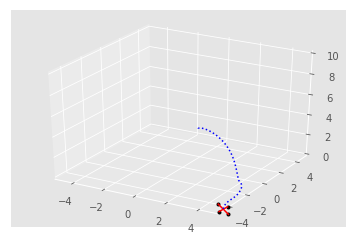

In [73]:
from PIL import Image

state = ddpg_agent.reset_episode() # start a new episode
vs = Visual(ddpg_agent.task.sim.pose)

test_widget = ipywidgets.Image(format='jpeg', width=244, height=244)
display(test_widget)
done = False

while True:
    action, _ = ddpg_agent.act(state)
    ddpg_agent.task.sim.set_motor_speeds('q1', [int(i) for i in action])
    bounds = ddpg_agent.task.sim.update(1/50.)
    
    # Run out of time or out of bounds
    if (ddpg_agent.task.sim.time > ddpg_agent.task.runtime):
        if bounds:
            print("Out of bounds: ", ddpg_agent.task.sim.pose[:3])
        done = True

    img = vs.real_time(ddpg_agent.task.sim.pose)
    f = io.BytesIO()
    img.save(f,'png')  
    test_widget.value = f.getvalue()

    if done:
        #vs.show_episode()
        #vs.save_gif("Final")
        print("Runtime: ", ddpg_agent.task.sim.time, ddpg_agent.task.sim.pose[:3])
        break

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

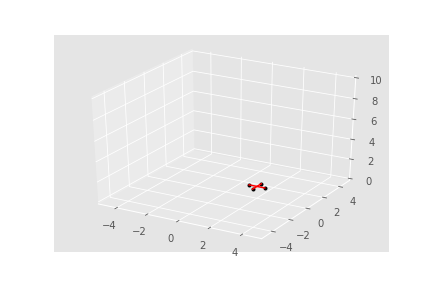

In [63]:
from IPython.display import Image
Image(filename='gifs/75.gif') 

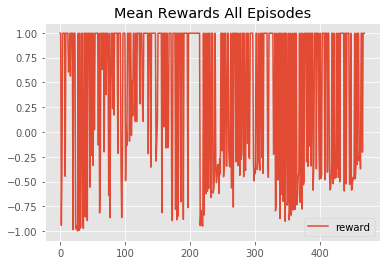

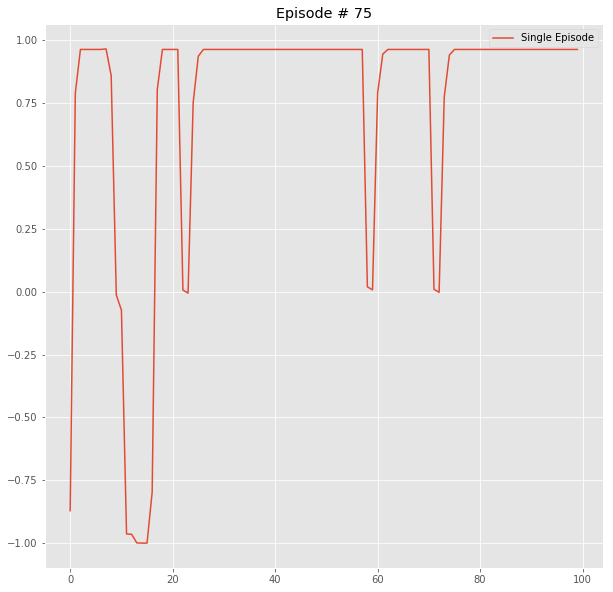

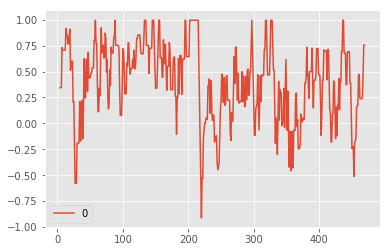

In [62]:
plot_stat(training_session)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 
- I attempted many different combinations, but ultimately decided to simplify by just normalizing the different between the pid output and the agent output and running it through a tanh function to get a value between -1 and 1. 

- Below is a preview of some of my attempts

In [66]:
data = pd.read_csv("trials.csv")
data.head(50)

,2.240036618619053,0.0001,0.0001.1,0.001,0.1,"[32, 32, 32]",150
0,2.240036618619053,0.0001,0.0001,0.001,0.10,"[32, 32, 32]",300
1,Mish Activation,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2831470487919965,0.0001,0.0001,0.001,0.10,"[32, 32, 32]",150
3,Kernel Init 0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0623295618337263,0.0001,0.0001,0.001,0.10,"[32, 32, 32]",150
5,1.2723363514739805,0.0001,0.0001,0.001,0.10,"[32, 32, 32]",150
6,Sigma,NaN,NaN,NaN,NaN,NaN,NaN
7,2.5391357644782464,0.0001,0.0001,0.001,0.01,"[32, 32, 32]",150
8,2.5391357644782464,0.0001,0.0001,0.001,0.01,"[32, 32, 32]",300
9,2.5391357644782464,0.0001,0.0001,0.001,0.01,"[32, 32, 32]",450


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I tried DDPG with different layer configurations, after much trial and error, I ended up using a version similar to the implementation in the DDPG paper. I found DDPG to be highly sensitive hyperparameters. Just for comparison, I was able to train a Neural Net with a simple MSE successfully, however DDPG was much more challenging. I attempted to explore many unique ways to get the best possible result, but none were able to give me the results I had hoped.
    * Small to large architectures.
    * Varying state spaces.
    * Varying action spaces.
    * Varying action repeat.
    * Reward Functions utilizing position, velocity, angular velocity, and ultimately, a pid output.
    * Varying batch sizes and buffer sizes.
    * New activation functions from articles (mish) and optimizers (RAdam)
    * Learning rate, regularization, drop-out layers.
    * After trying several combinations of above, I decided to try another Quadcopter simulation. 

- After much trial and error, the final parameters I concluded with. 
- Actor: 1e-5 Critic: 1e-4 gamma = 0.99 tau = 0.01 exploration_sigma = 0.2 
- Letting the Actor learn at a lower rate, slightly improved stability.

In [68]:
ddpg_agent.actor_target.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 12)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12)                48        
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1664      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
__________

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- My goal was to have the Quadcopter start from any location and fly to the target location and hover for as long as possible. This task turned out to be very difficult to accomplish with DDPG.
- This project was definitely a gradual learning curve. I learned a great deal about Quadcopter physics, Neural net architecures, different layers, regularizers, reward functions, DPPG in detail etc. I went through several reward functions before I finally developed a stable function with unit variance. 
- The final performance was not what I had hoped it would be. The Quadcopter would hover around the location for a few seconds and fall or miss the target entirely.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- Designing the reward function and tweaking the hyperparameters were the most difficult parts of the project. I started saving and plotting everything I could to help crack the problem. I modified a Quadrotor library for this project and added some features for detailed analysis. There are so many variables to consider. The outcome of the training session wasn't necessarily a result of changing specific parameters, that's what made this project challenging. To combat this, I attempted to lock the random seed to observe the effect of specific changes, which was not able to help much.
- I thought visualizing the Quadcopter training would inspire some new approaches, so I decided to find a way to implement a visual in the notebook. I was able to modify a library I found online to suit this need. However, displaying the animation in real-time in the notebook was quite challenging. Luckily, imagewidgets saved the day.
- This project partly inspired my final project, which was to build a real life Reinforcement Learning car that could learn in real-time. I found the Quadcopter's inability to stay in one location no matter the model, interesting. Only a PID controller was able to accomplish this. I plan to revisit this project at another time with greater domain knowledge to attempt again.